In [2]:
import gymnasium as gym
import pkg_resources
import numpy as np
from factory_env.envs.parameters import env_param
import matplotlib.pyplot as plt
import time
from shapely.geometry import LinearRing, LineString, Point
from shapely.ops import unary_union


options = {'init_type': 'load', 'file_name': 'test.pkl'}
# options = {'init_type': 'run', 'file_name': 'test.pkl'}

params:env_param = env_param()
params.atr_param.atr_linear_vel_max = 0.2
params.path_param.target_finishing_time = 30

print(params.sensor_param.angles_of_sectors.shape)
env = gym.make('training-factory-v0', params=params,)
next_obs, info = env.reset(options=options)

action = env.action_space.sample()
observation, reward, done, truncated, info = env.step(action)

# print(env.path.wall_up)

(20,)


/home/zhicun/miniconda3/envs/DRL/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.path to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.path` for environment variables or `env.get_wrapper_attr('path')` that will search the reminding wrappers.
  logger.warn(


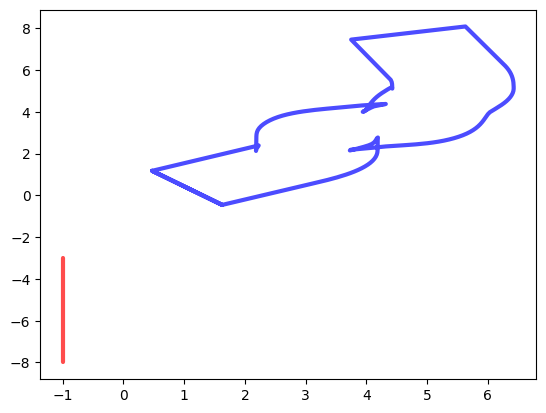

In [3]:
exterior =  np.vstack([env.path.start_line, env.path.wall_up, env.path.end_line[::-1], env.path.wall_down[::-1]])

ring = LinearRing(exterior)
line = LineString([(-1, -8), (-1, -3)])
intersection = ring.intersection(line)


# Plot the original shapes
x, y = ring.xy
plt.plot(x, y, color='blue', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
x, y = line.xy
plt.plot(x, y, color='red', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

# Plot the intersection(s)
if intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'ko')
elif intersection.geom_type == 'MultiPoint':
    for point in intersection.geoms:
        plt.plot(*point.xy, 'ko')
elif intersection.geom_type == 'LineString':
    x, y = intersection.xy
    plt.plot(x, y, 'ko')

plt.show()

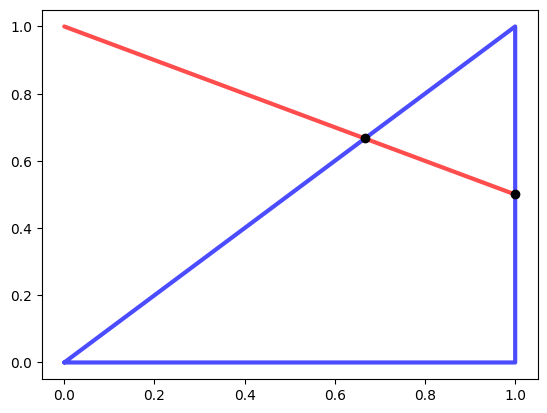

In [4]:
import matplotlib.pyplot as plt
from shapely.geometry import LinearRing, LineString, Point
from shapely.ops import unary_union

# Create a LinearRing and a LineString
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
line = LineString([(0, 1), (1, 0.5)])

# Find the intersection
intersection = ring.intersection(line)

# Plot the original shapes
x, y = ring.xy
plt.plot(x, y, color='blue', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
x, y = line.xy
plt.plot(x, y, color='red', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

# Plot the intersection(s)
if intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'ko')
elif intersection.geom_type == 'MultiPoint':
    for point in intersection.geoms:
        plt.plot(*point.xy, 'ko')
elif intersection.geom_type == 'LineString':
    x, y = intersection.xy
    plt.plot(x, y, 'ko')

plt.show()


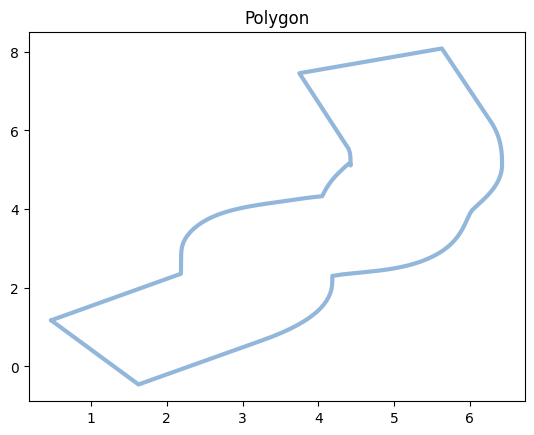

In [5]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Create a Polygon
polygon = env.path.bounding_box_polygon

# Get x and y coordinates
x,y = polygon.exterior.xy

# Create a plot
fig, ax = plt.subplots()

# Add the polygon to the plot
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

# Set the title
ax.set_title('Polygon')

# Show the plot
plt.show()


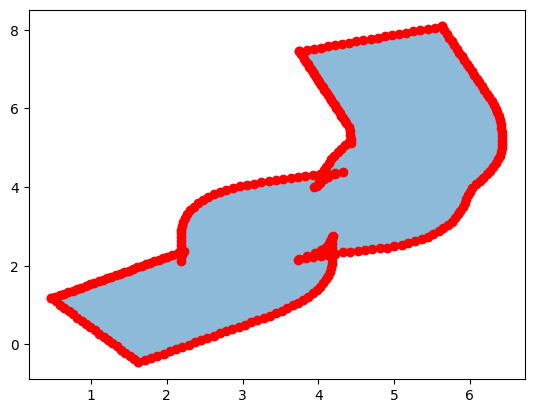

In [6]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are your arrays
wall_up = np.array([[1, 2], [3, 2]])
wall_down = np.array([[1, 0], [3, 0]])
start_line = np.array([[1, 0], [1, 2]])
end_line = np.array([[3, 0], [3, 2]])

# Combine all segments in correct order
# exterior = np.vstack((start_line, wall_up, end_line[::-1], wall_down[::-1]))
exterior =  np.vstack([env.path.start_line, env.path.wall_up, env.path.end_line[::-1], env.path.wall_down[::-1]])

# Create a polygon
polygon = Polygon(exterior)

# Visualize it
x,y = polygon.exterior.xy
plt.plot(x, y, 'blue')
plt.fill(x, y, alpha=0.5)

# Mark the vertices
for point in exterior:
    plt.plot(*point, 'ro')

plt.show()


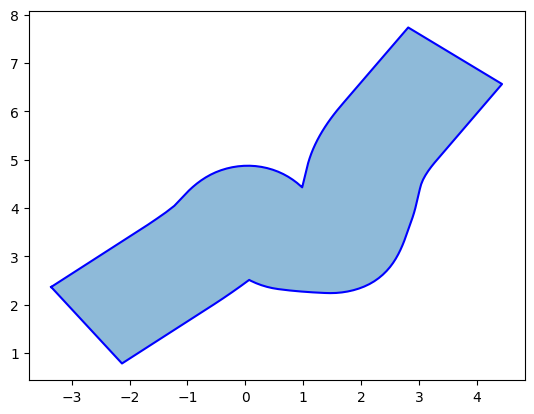

In [7]:
params:env_param = env_param()
env = gym.make('training-factory-v0', params=params,)
next_obs, info = env.reset()
# env.render()
polygon = env.path.bounding_box_polygon
x,y = polygon.exterior.xy

exterior = polygon.exterior
# Visualize it
x,y = polygon.exterior.xy
plt.plot(x, y, 'blue')
plt.fill(x, y, alpha=0.5)


plt.show()

/home/zhicun/miniconda3/envs/DRL/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.path to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.path` for environment variables or `env.get_wrapper_attr('path')` that will search the reminding wrappers.
  logger.warn(


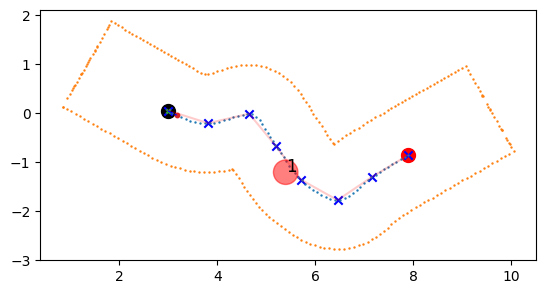

In [23]:
params:env_param = env_param()
params.path_param.No = 1
params.path_param.without_walls = False
env = gym.make('training-factory-v0', params=params,)
next_obs, info = env.reset()
# env.render()
fig, ax = plt.subplots()
env.path.render(ax)
# waypoints = env.path.waypoints
# plt.plot(waypoints[:, 0], waypoints[:, 1], 'xk')
# plt.plot(waypoints[:, 0], waypoints[:, 1], '--')
ax.set_aspect('equal')


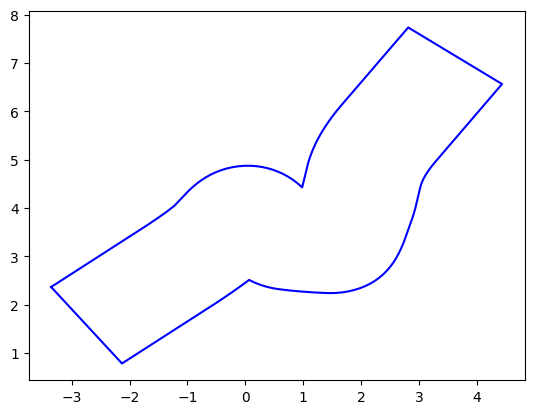

In [8]:
cleaned_polygon = polygon.buffer(0)
new_bounding_box_polygon = cleaned_polygon
x,y = new_bounding_box_polygon.exterior.xy
# Visualize it
plt.plot(x, y, 'blue')
# plt.fill(x, y, alpha=0.5)


plt.show()

In [9]:
from shapely.geometry import LineString, Point
import numpy as np

def remove_self_intersections(line):
    line_string = LineString(line)
    # Create a list to hold the parts of the line that do not intersect
    non_intersecting_parts = []
    # Iterate through each pair of segments in the line
    for i in range(len(line) - 1):
        segment = LineString(line[i:i+2])
        # Check if this segment intersects with the rest of the line
        rest_of_line = LineString(line[i+2:] + line[:i])
        if not segment.intersects(rest_of_line):
            non_intersecting_parts.append(segment)
        else:
            # If there is an intersection, find the intersection point
            intersection_point = segment.intersection(rest_of_line)
            if isinstance(intersection_point, Point):
                # If the intersection is a single point, split the segment at the intersection
                coords = list(segment.coords)
                new_segment = LineString([coords[0], (intersection_point.x, intersection_point.y)])
                non_intersecting_parts.append(new_segment)
            # If the intersection is more complex (e.g., a line), you might need to handle it differently
            # Depending on the specifics of your lines, you may need additional logic here
    
    # Reconstruct the non-intersecting line parts into a single line
    reconstructed_line = []
    for part in non_intersecting_parts:
        reconstructed_line.extend(list(part.coords[:-1]))
    # Add the last point of the last segment
    reconstructed_line.append(non_intersecting_parts[-1].coords[-1])
    
    return np.array(reconstructed_line)

# Assuming self.wall_up and self.wall_down are your original lines
self.wall_up = remove_self_intersections(self.wall_up)
self.wall_down = remove_self_intersections(self.wall_down)


NameError: name 'self' is not defined